In [1]:
%config InlineBackend.figure_format = 'svg'

from hmr import Reloader
import heatgraphy as hg

hg = Reloader(hg)

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib.patches import Rectangle, Polygon
from matplotlib.collections import PatchCollection, PathCollection
from matplotlib.artist import Artist

In [3]:
data = np.random.choice([0, 1, 2, 3], (5, 10))
mapper = {
    0: hg.layers.Rect(color="red"),
    1: hg.layers.Rect(color="purple"),
    2: hg.layers.FrameRect(color="yellow"),
    3: hg.layers.FracRect(color="blue"),
    4: hg.layers.Rect(color="orange"),
}

[0, 2, 10]


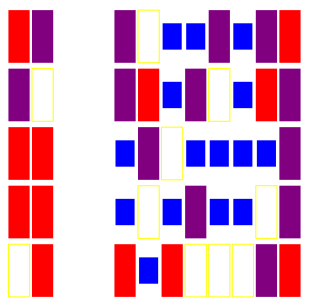

In [8]:
l = hg.layers.Layers(data=data, pieces=mapper)
l.split_col(cut=[2], spacing=0.2)
l.render()

In [9]:
d0 = np.random.choice([0, 1], (5, 10))
d1 = np.random.choice([0, 1], (5, 10))
d2 = np.random.choice([0, 1], (5, 10))
d3 = np.random.choice([0, 1], (5, 10))
d4 = np.random.choice([0, 1], (5, 10))

layers = [d0, d1, d2, d3, d4]

pieces = [
    hg.layers.Rect(color="red"),
    hg.layers.Rect(color="purple"),
    hg.layers.Rect(color="orange"),
    hg.layers.FrameRect(color="green"),
    hg.layers.FracRect(color="blue"),
]

In [17]:
from uuid import uuid4

In [22]:
uuid4().hex

'd11b8b6fdc5344e7ad86e35f47d7d51f'

invalid syntax (layout.py, line 146)
cannot import name 'CrossGrid' from 'heatgraphy.layout' (C:\Users\Milk\Projects\heatgraphy\heatgraphy\layout.py)


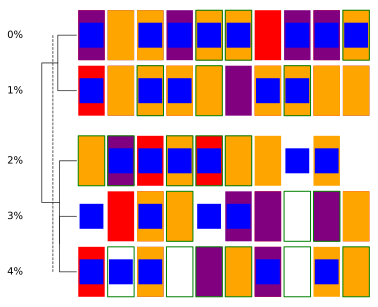

In [15]:
la = hg.layers.Layers(layers=layers, pieces=pieces, cluster_data=d0)
la.split_row(cut=[2], spacing=0.05)
la.add_dendrogram("left")
la.add_plot("left", hg.plotter.Labels([f"{i}%" for i in [0, 1, 2, 3, 4]]))
la.render()

In [45]:
from itertools import tee, groupby
def pairwise(iterable):
    """This is not available in itertools until 3.10"""
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

In [42]:

def get_breakpoints(arr):
    uniq = set(arr)
    breakpoints = []
    for ix, (a, b) in enumerate(pairwise(arr)):
        if a != b:
            breakpoints.append(ix+1)
    if len(breakpoints) != len(uniq) - 1:
        raise ValueError()
    return breakpoints

In [44]:
get_breakpoints([0,0,0,0,0,1,1,1,1,1,0,0,0,0])

ValueError: 

In [52]:
arr = [0,0,0,0,0,1,1,1,1,1,0,0,0,0]

In [60]:
def get_index(arr):
    uniq = set(arr)
    indices = {x:[] for x in uniq}
    for ix, a in enumerate(arr):
        indices[a].append(ix)
    return indices

def reorder_index(indices, order=None):
    final_index = []
    if order is not None:
        for it in order:
            final_index += indices[it]
    else:
        for it in indices.values():
            final_index += it
    return final_index

In [62]:
ri = reorder_index(get_index(arr))

In [63]:
np.asarray(arr)[ri]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

expected an indented block after function definition on line 103 (base.py, line 107)
cannot import name 'pairwise' from 'heatgraphy.utils' (C:\Users\Milk\Projects\heatgraphy\heatgraphy\utils.py)


In [47]:
groups = []
uniquekeys = []
for k, g in groupby([0,0,0,0,0,1,1,1,1,1,0,0,0,0]):
    groups.append(list(g))      # Store group iterator as a list
    uniquekeys.append(k)

In [48]:
groups

[[0, 0, 0, 0, 0], [1, 1, 1, 1, 1], [0, 0, 0, 0]]

In [50]:
uniquekeys

[0, 1, 0]